In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.4.0


In [3]:
from tensorflow import keras

In [4]:
from tensorflow.keras import layers

In [42]:
from tensorflow.keras.datasets import mnist

In [43]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
print(x_train.shape)

(60000, 28, 28)


In [8]:
print(x_train[59999::].shape)

(1, 28, 28)


In [9]:
print("Initial shape and dimensions of x_train:", str(x_train.shape))
print("Number of samples in our training data:", str(len(x_train)))
print("Number of lables in our test data:", str(len(x_test)))

Initial shape and dimensions of x_train: (60000, 28, 28)
Number of samples in our training data: 60000
Number of lables in our test data: 10000


In [10]:
print("Number of Samples in Test data:", str(len(x_test)))
print("Number of Labels in Test Data:", str(len(y_test)))

Number of Samples in Test data: 10000
Number of Labels in Test Data: 10000


<font size="5">Showing The Data using OpenCV and matplotlib </font>

In [11]:
import cv2
import numpy as np

In [12]:
for i in range (0,6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    window_name = 'Randome Sample #'+str(i)
    cv2.imshow(window_name, img)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
import matplotlib.pyplot as plt

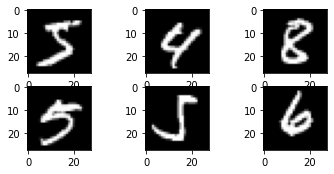

In [14]:
plt.subplot(334)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[0], cmap='gray')
plt.subplot(335)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap='gray')
plt.subplot(336)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap='gray')
plt.subplot(337)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap='gray')
plt.subplot(338)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap='gray')
plt.subplot(339)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap='gray')

<font size="5">Reshaping The Data to be (Number of samples, rows, columns, depth) </font>

In [44]:
img_rows = x_train[0].shape[0] #rows of the first image (28x28)
img_cols = x_train[0].shape[1] #columns of the first image (28,28)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [45]:
print("Initial shape and dimensions of x_train:", str(x_train.shape))
print("Initial shape and dimensions of x_test:", str(x_test.shape))

Initial shape and dimensions of x_train: (60000, 28, 28, 1)
Initial shape and dimensions of x_test: (10000, 28, 28, 1)


<font size="5">Transformation of Data (Normalization) </font>

In [46]:
x_train /= 255
x_test /= 255

In [47]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


<font size="5">One-Hot Encoding the Output </font>

In [48]:
y_train[0] #we want this to be (0,0,0,0,0,1,0,0,0,0)

5

In [49]:
from tensorflow.keras.utils import to_categorical

In [50]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [51]:
print("Number of Classes:" +str(y_train.shape[1]))

Number of Classes:10


In [52]:
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1]*x_train.shape[2]

In [53]:
num_classes

10

In [54]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

<font size="5">Building And Compiling the Model</font>

In [117]:
from tensorflow.keras import layers

In [118]:
model = tf.keras.Sequential()

In [119]:
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [124]:
model.compile(loss="categorical_crossentropy", optimizer='SGD', metrics=['accuracy'])

In [128]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)              

<font size="5">Training the Model</font>

In [126]:
batch_size = 32
epochs = 9

In [127]:
history = model.fit(x_train,y_train, batch_size = batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/9
1875/1875 [==============================] - 62s 32ms/step - loss: 0.9952 - accuracy: 0.6813 - val_loss: 0.1936 - val_accuracy: 0.9436
Epoch 2/9
1875/1875 [==============================] - 61s 33ms/step - loss: 0.3254 - accuracy: 0.9039 - val_loss: 0.1407 - val_accuracy: 0.9571
Epoch 3/9
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2391 - accuracy: 0.9293 - val_loss: 0.1057 - val_accuracy: 0.9676
Epoch 4/9
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1892 - accuracy: 0.9424 - val_loss: 0.0828 - val_accuracy: 0.9744
Epoch 5/9
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1535 - accuracy: 0.9555 - val_loss: 0.0690 - val_accuracy: 0.9786
Epoch 6/9
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1289 - accuracy: 0.9627 - val_loss: 0.0572 - val_accuracy: 0.9813
Epoch 7/9
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1080 - accuracy: 0.9683 - val_loss: 0.0510 - val_ac

<font size="5">Validation vs Train Loss</font>

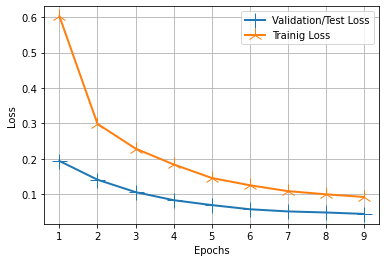

In [132]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Trainig Loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize='15')
plt.setp(line2, linewidth=2.0, marker='2', markersize='15')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

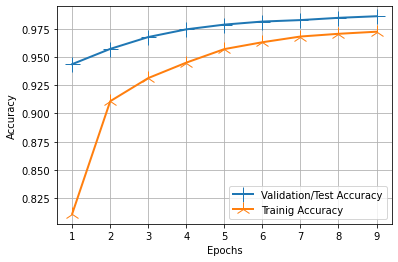

In [135]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)
line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Trainig Accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize='15')
plt.setp(line2, linewidth=2.0, marker='2', markersize='15')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [134]:
print(history.history)

{'loss': [0.6027543544769287, 0.29860904812812805, 0.22867949306964874, 0.18395115435123444, 0.14566819369792938, 0.12509149312973022, 0.1084253266453743, 0.09943292289972305, 0.09191320091485977], 'accuracy': [0.8110833168029785, 0.9107999801635742, 0.9312999844551086, 0.9449666738510132, 0.956933319568634, 0.9629999995231628, 0.9680500030517578, 0.970466673374176, 0.9723166823387146], 'val_loss': [0.19362953305244446, 0.14071044325828552, 0.10565289109945297, 0.08280722796916962, 0.06895968317985535, 0.0571962334215641, 0.051016196608543396, 0.047998249530792236, 0.04395829513669014], 'val_accuracy': [0.9435999989509583, 0.957099974155426, 0.9675999879837036, 0.974399983882904, 0.978600025177002, 0.9812999963760376, 0.9825999736785889, 0.9846000075340271, 0.9860000014305115]}


<font size="5">Saving and Loading The Model (Start From Here Next Time)</font>

In [136]:
model.save("./mnist.h5")

In [26]:
from tensorflow.keras.models import load_model

In [27]:
model = load_model("mnist.h5")

<font size="5">Predicting on the Test data and printing Confusion and Classification Reports</font>

In [55]:
predictions = model.predict_classes(x_test)

d:\programes\new folder\envs\tf-cpu\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [56]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [30]:
import pandas as pd

In [57]:
from tensorflow.keras.utils import plot_model
%matplotlib inline

In [58]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [59]:
from sklearn.metrics import classification_report

In [60]:
y_test = np.argmax(y_test, axis=1)  # returning back to single encoded data 

In [61]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix

array([[ 973,    1,    1,    0,    0,    0,    3,    1,    1,    0],
       [   0, 1125,    5,    0,    0,    0,    3,    0,    2,    0],
       [   2,    1, 1020,    1,    1,    0,    0,    6,    1,    0],
       [   0,    0,    2, 1000,    0,    2,    0,    3,    2,    1],
       [   0,    0,    3,    0,  971,    0,    4,    0,    1,    3],
       [   2,    0,    0,    6,    0,  877,    2,    1,    3,    1],
       [   5,    2,    0,    1,    1,    2,  943,    0,    4,    0],
       [   1,    1,    8,    3,    0,    0,    0, 1012,    1,    2],
       [   3,    0,    2,    3,    1,    1,    0,    2,  957,    5],
       [   4,    3,    0,    4,    8,    0,    0,    6,    2,  982]],
      dtype=int64)